In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Phase I 
# 1) Load Data
X_train= pd.read_csv('X_train.txt', sep=" ", header=None)
y_train= pd.read_csv('y_train.txt',sep=" ",header=None)
X_test=pd.read_csv('X_test.txt', sep=" ", header=None)
y_test=pd.read_csv('y_test.txt', sep=" ", header=None)

In [3]:
# 2)*train test split
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(
X_train,y_train, test_size=0.20, random_state=0, shuffle = True)

In [3]:
#3) identify if there is missing data
# Concatenate train & test


dataset = pd.concat(objs=[X_train, X_test], axis=0)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10929 entries, 0 to 3161
Columns: 561 entries, 0 to 560
dtypes: float64(561)
memory usage: 46.9 MB


In [4]:
total=dataset.isnull().sum().sort_values(ascending=False)
percent = (dataset.isnull().sum()/dataset.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
560,0,0.0
183,0,0.0
189,0,0.0
188,0,0.0
187,0,0.0


In [5]:
# *using ‘k-NN impute' to fill missing data
import numpy as np
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
print(imputer.fit_transform(X_train))

[[ 0.04357967 -0.00597022 -0.03505434 ... -0.84155851  0.17991281
  -0.05171842]
 [ 0.03948004 -0.00213128 -0.02906736 ... -0.8450924   0.18026111
  -0.04743634]
 [ 0.03997778 -0.00515272 -0.02265071 ... -0.84923013  0.18060956
  -0.04227136]
 ...
 [ 0.03745094 -0.00272442  0.02100941 ... -0.77956634  0.24912145
   0.04707077]
 [ 0.04401105 -0.00453578 -0.0512422  ... -0.78560327  0.24640867
   0.03170003]
 [ 0.06895376  0.00181032 -0.08032343 ... -0.78369253  0.24678499
   0.04298129]]


In [47]:
# 4)identify unbanlance data
m=len(y_train)/12
y_train.groupby([0]).size()



0
1     1226
2     1073
3      987
4     1293
5     1423
6     1413
7       47
8       23
9       75
10      60
11      90
12      57
dtype: int64

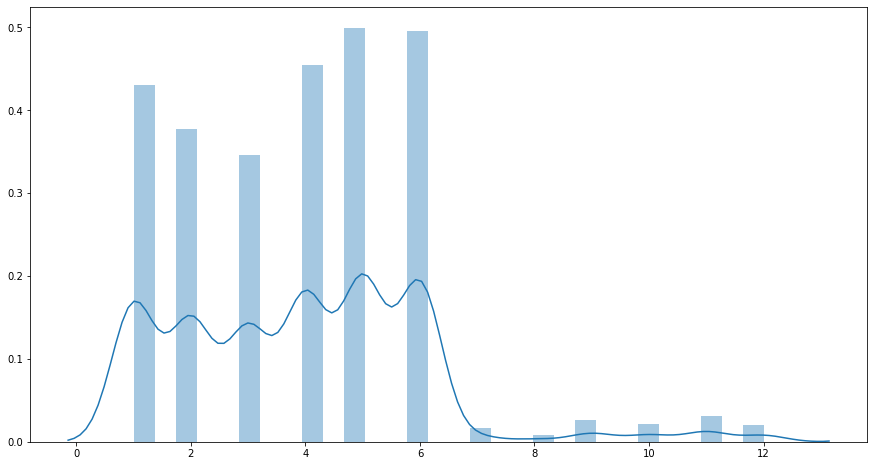

In [7]:
import seaborn as sns
plt.figure(figsize=(15,8))
sns.distplot(y_train, bins =30)

In [8]:
# using SMOTE sampling to make data more balanced

from imblearn.over_sampling import SMOTE
 
smote = SMOTE(kind = "regular")
X_sm, y_sm = smote.fit_sample(X_train, y_train)
len(X_sm)
X_sm.shape

C:\Users\xiaoy\Anaconda4\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\xiaoy\Anaconda4\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\xiaoy\Anaconda4\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in

(17076, 561)

In [9]:
# 5)Identify which columns/variables are numerical and which are categorical


num_cols = dataset._get_numeric_data().columns

num_cols


Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            551, 552, 553, 554, 555, 556, 557, 558, 559, 560],
           dtype='int64', length=561)

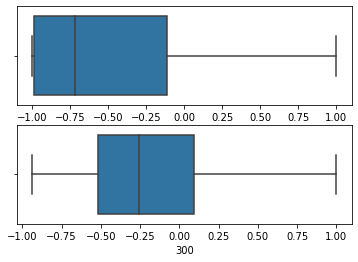

In [42]:
#6) identify outlier, change outliers
import seaborn as sns
plt.subplot(2,1,1)
sns.boxplot(X_train)
plt.subplot(2,1,2)
sns.boxplot(X_train[300])



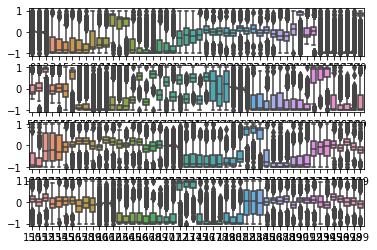

In [35]:
plt.subplot(4,1,1)
sns.boxplot(data=X_train.iloc[:,0:50])
plt.subplot(4,1,2)
sns.boxplot(data=X_train.iloc[:,50:100])
plt.subplot(4,1,3)
sns.boxplot(data=X_train.iloc[:,100:150])
plt.subplot(4,1,4)
sns.boxplot(data=X_train.iloc[:,150:200])


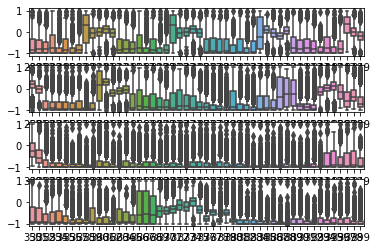

In [36]:
plt.subplot(4,1,1)
sns.boxplot(data=X_train.iloc[:,200:250])
plt.subplot(4,1,2)
sns.boxplot(data=X_train.iloc[:,250:300])
plt.subplot(4,1,3)
sns.boxplot(data=X_train.iloc[:,300:350])
plt.subplot(4,1,4)
sns.boxplot(data=X_train.iloc[:,350:400])

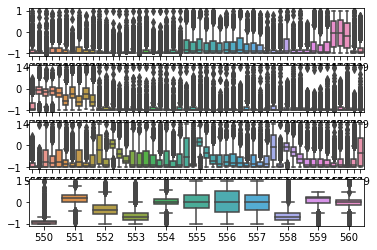

In [37]:
plt.subplot(4,1,1)
sns.boxplot(data=X_train.iloc[:,400:450])
plt.subplot(4,1,2)
sns.boxplot(data=X_train.iloc[:,450:500])
plt.subplot(4,1,3)
sns.boxplot(data=X_train.iloc[:,500:550])
plt.subplot(4,1,4)
sns.boxplot(data=X_train.iloc[:,550:600])

In [44]:
X_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
count,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,...,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000
mean,0.038759,-0.000647,-0.018155,-0.599017,-0.634424,-0.691270,-0.623886,-0.657884,-0.740154,-0.360200,...,0.161745,-0.316548,-0.625132,0.016774,0.018471,0.009239,-0.005184,-0.485936,0.050310,-0.052888
std,0.101996,0.099974,0.089927,0.441481,0.367558,0.321641,0.418113,0.348005,0.272619,0.499259,...,0.237319,0.313899,0.302581,0.331326,0.443540,0.601208,0.477218,0.509278,0.300866,0.276196
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.958535,-1.000000,-1.000000,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.987874
25%,0.032037,-0.011209,-0.028448,-0.992140,-0.983570,-0.984661,-0.992902,-0.984131,-0.986661,-0.795613,...,0.020312,-0.548129,-0.843966,-0.108225,-0.261002,-0.470267,-0.373565,-0.810953,-0.047752,-0.140560
50%,0.038975,-0.002921,-0.019602,-0.914202,-0.827970,-0.827696,-0.924421,-0.838559,-0.852735,-0.717007,...,0.170819,-0.353980,-0.710071,0.017627,0.029079,0.001515,-0.005503,-0.706619,0.176777,0.004583
75%,0.044000,0.004303,-0.011676,-0.246026,-0.313069,-0.450478,-0.294903,-0.362671,-0.540521,0.054178,...,0.316240,-0.137462,-0.503837,0.167695,0.314876,0.496871,0.352690,-0.488765,0.246834,0.109507
max,1.000000,1.000000,1.000000,1.000000,0.945956,1.000000,1.000000,0.960341,1.000000,1.000000,...,1.000000,0.938491,0.911653,1.000000,1.000000,0.998702,0.991288,1.000000,0.482229,1.000000


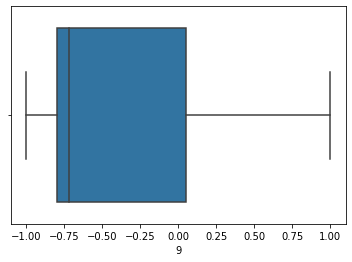

In [45]:
sns.boxplot(X_train[9])

In [43]:
# it looks like there is no outlier
#if there is , we will replace the outlier with 75% value if it is too large, with 25% if it is too small
# X_train[9]=np.where(X_train[9]>=0.054,0.054,X_train[9])

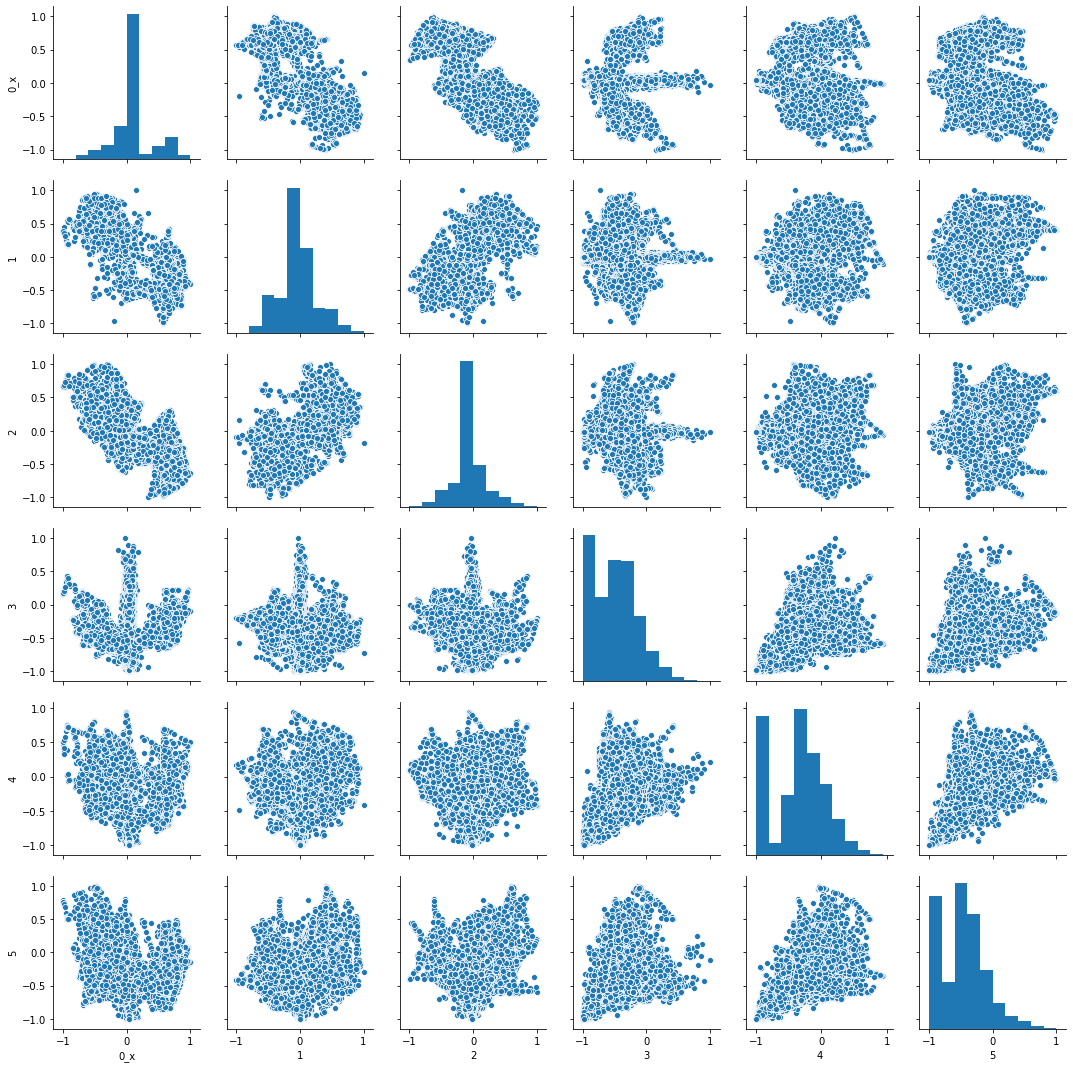

In [10]:
#7)Exploratory data analysis
#Plot pairs of numeric variables (less imp) (shows how variables are related with each other . Linearly correlated? Nonlinearly correlated?)

# library & dataset
import seaborn as sns
import pandas as pd
new_df = pd.merge(pd.DataFrame(X_sm), pd.DataFrame(y_sm),  how='left', left_index=True, right_index = True)
new_df.head()
column=['0_x',1,2,3,4,5]
dfp=new_df[column]
dfp.head()
sns.pairplot(dfp)

In [11]:
#8)boxplot patten
new_d4=new_df[new_df['0_y']==4]
len(new_d4)
new_d10=new_df[new_df['0_y']==10]
len(new_d10)

1423

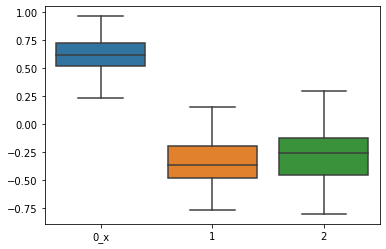

In [12]:
sns.boxplot(data=new_d10.iloc[:,0:3])

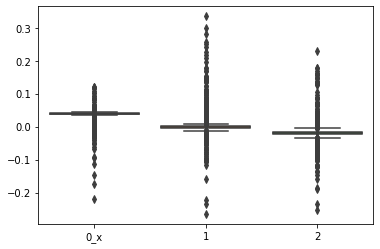

In [13]:
sns.boxplot(data=new_d4.iloc[:,0:3])

In [14]:
#9)Apply principal components analysis to just input variable
from sklearn.decomposition import PCA

pca = PCA(n_components=0.8)
x_pca = pca.fit_transform(X_sm)
X_sm.shape, x_pca.shape

((17076, 561), (17076, 14))

In [15]:

#10)numerical columns
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_trainp=scaler.transform(X_sm)
X_testp=scaler.transform(X_test)
X_trainp

array([[ 4.72690278e-02, -5.32536396e-02, -1.87937459e-01, ...,
        -6.98332451e-01,  4.30793616e-01,  4.23380815e-03],
       [ 7.07236314e-03, -1.48515677e-02, -1.21357287e-01, ...,
        -7.05271912e-01,  4.31951346e-01,  1.97385973e-02],
       [ 1.19527108e-02, -4.50759014e-02, -4.99988185e-02, ...,
        -7.13397137e-01,  4.33109572e-01,  3.84402246e-02],
       ...,
       [ 6.12571033e+00, -4.00326250e+00, -3.01054122e+00, ...,
         1.67442057e+00, -2.88210349e+00, -1.18659218e-01],
       [ 6.98806122e+00, -4.69664355e+00, -3.42347980e+00, ...,
         1.68721227e+00, -2.31224583e+00, -8.74810645e-01],
       [ 5.76813809e+00, -1.27218510e+00, -4.00223708e+00, ...,
         1.87411883e+00, -1.64914668e+00, -1.73629533e+00]])

In [ ]:
# 2)*apply ‘one-hot encoding/dummy coding’ only to categorical variables
    
#enc = preprocessing.OneHotEncoder()
#X = ['categorical columns']
#enc.fit(X)
#OneHotEncoder()
#enc.transform(X).toarray()
